In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import load_model
model = load_model('./training_models/NN_digit.h5')

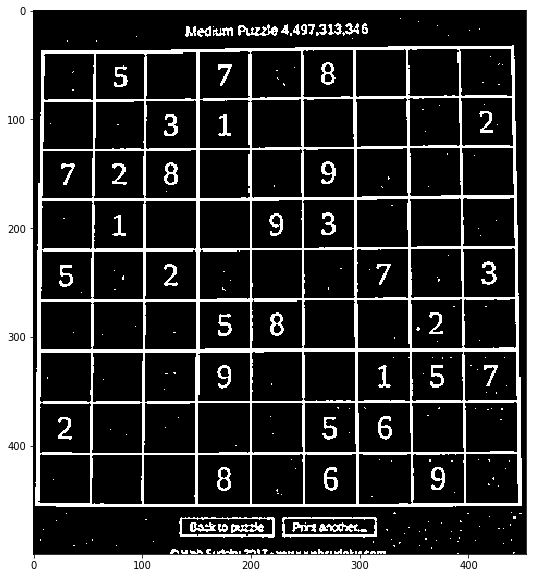

In [2]:
Points = np.load('./Points.npy')

img = cv2.imread('./Data/S_03.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

r, c = gray.shape
out_row = 500
gray = cv2.resize(gray, (int(out_row * float(c)/r), out_row))

gray = cv2.GaussianBlur(gray, (3, 3), 0)

im_th = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)

plt.figure(num =0, figsize=(10, 10))
plt.imshow(im_th, 'gray')
plt.show()

[[6 6 6 7 6 6 6 7 2]
 [6 6 6 6 6 6 6 7 2]
 [6 6 6 2 6 6 6 7 7]
 [6 6 6 6 6 6 6 6 2]
 [6 6 6 6 6 6 6 2 2]
 [6 6 6 6 6 6 6 2 6]
 [6 6 6 6 6 6 6 6 6]
 [6 6 6 7 6 6 2 7 7]
 [2 7 2 2 6 6 7 3 3]]


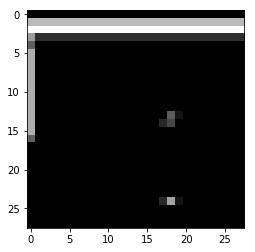

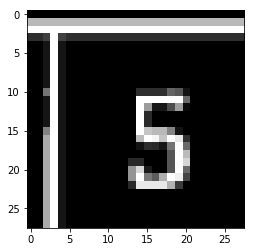

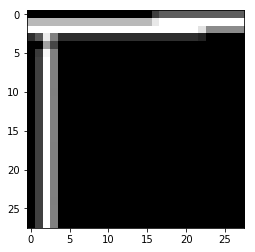

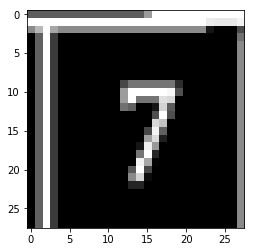

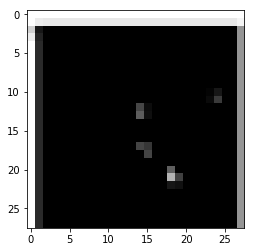

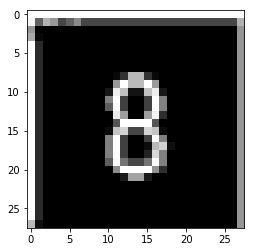

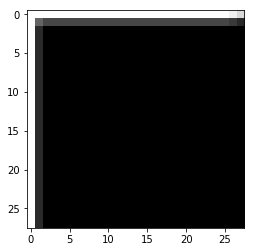

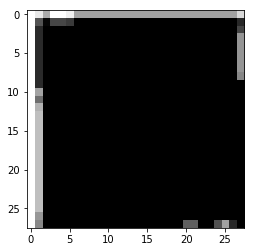

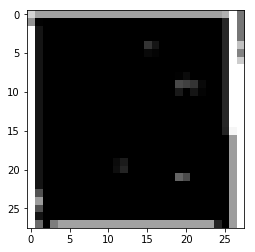

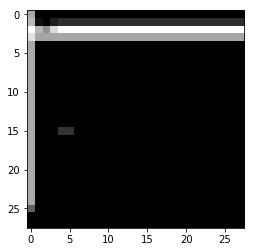

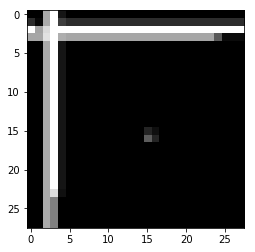

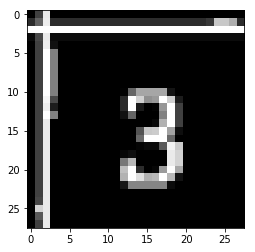

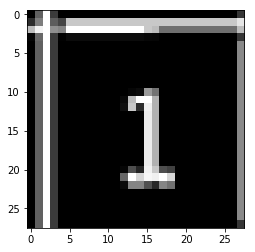

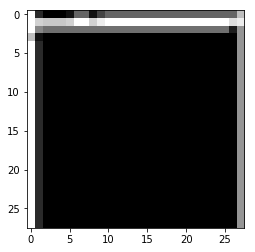

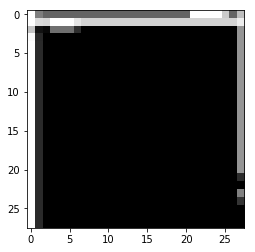

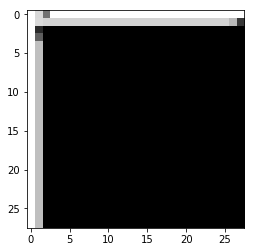

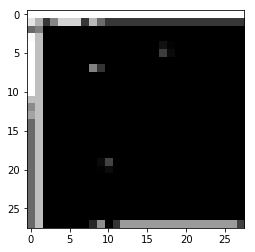

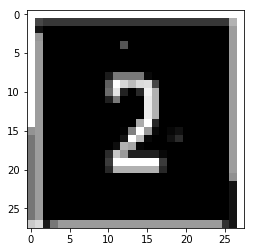

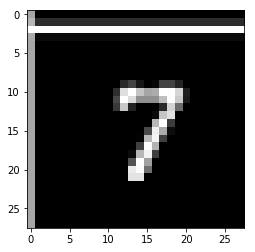

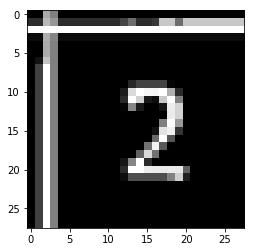

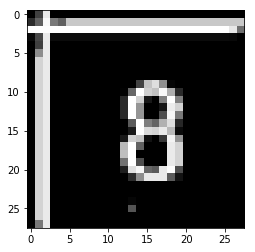

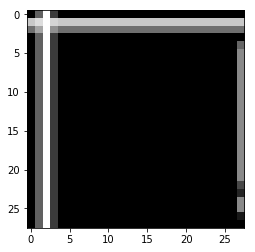

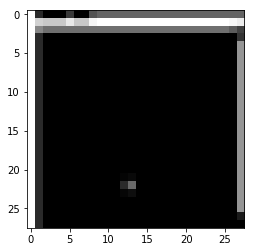

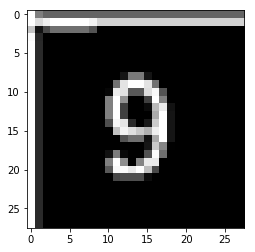

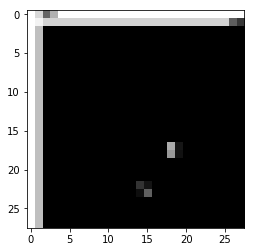

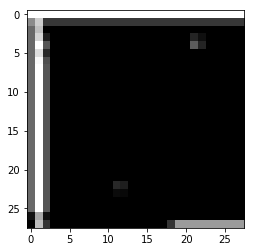

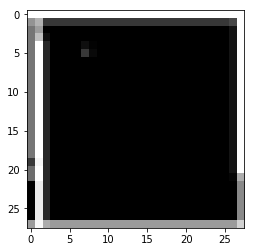

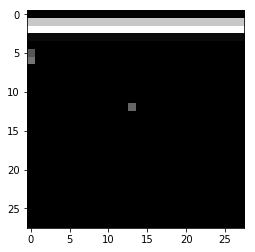

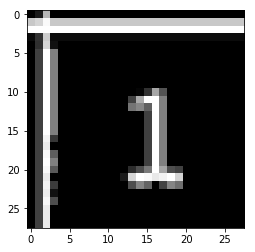

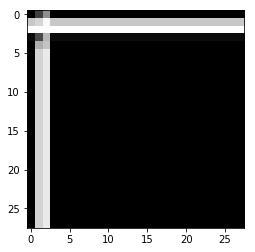

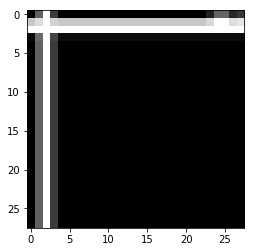

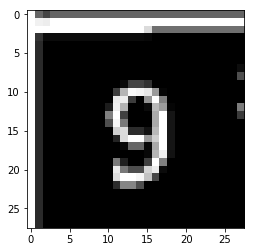

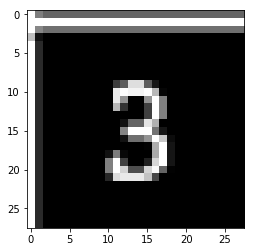

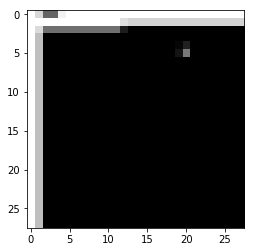

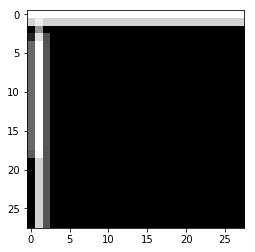

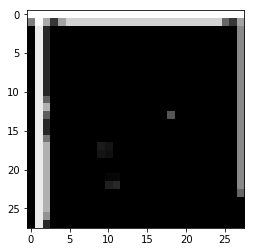

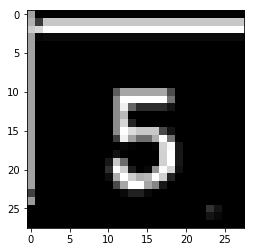

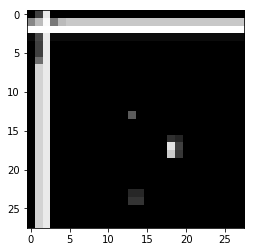

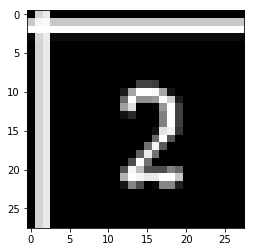

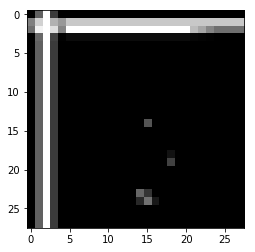

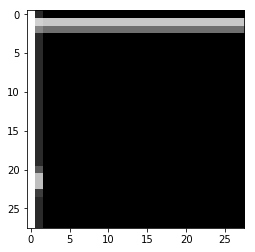

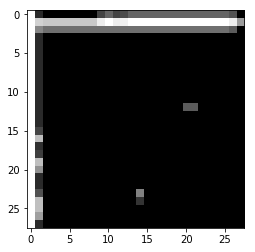

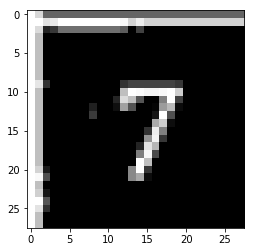

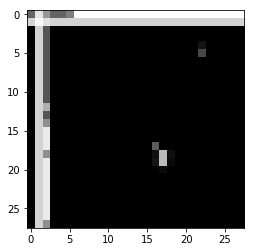

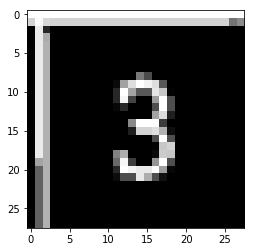

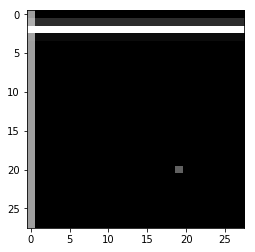

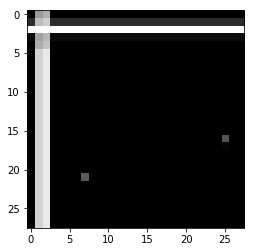

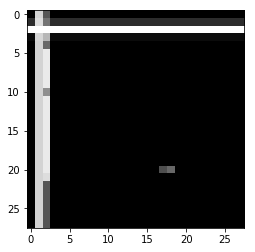

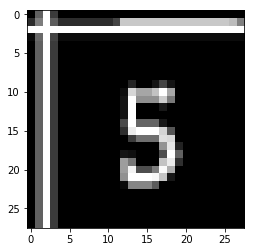

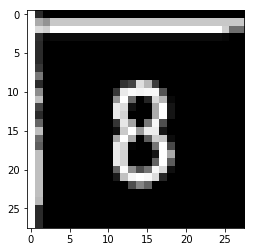

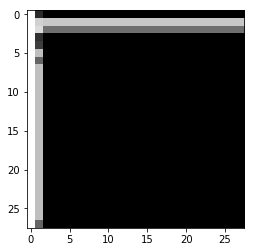

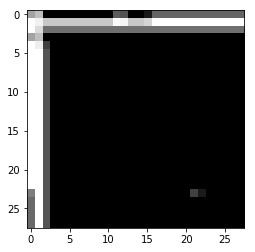

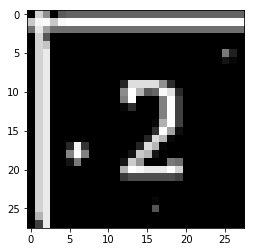

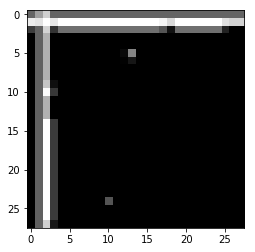

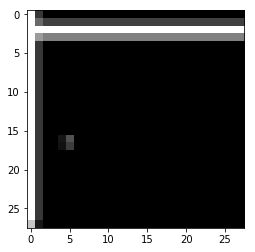

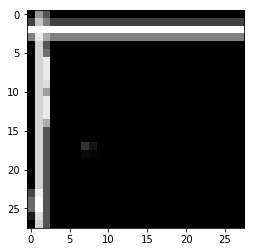

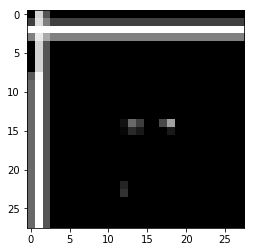

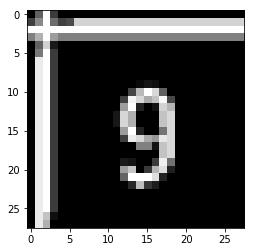

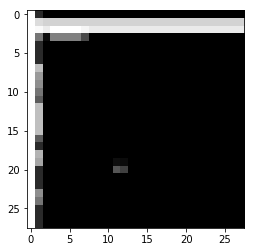

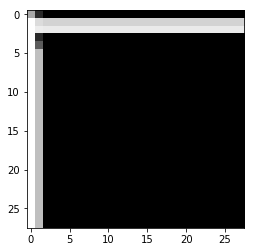

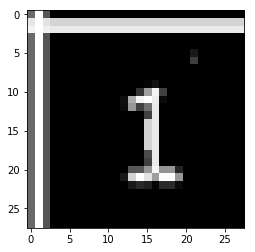

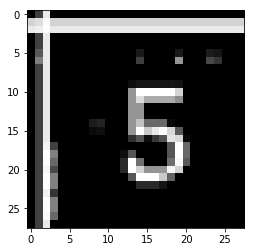

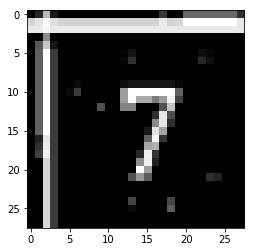

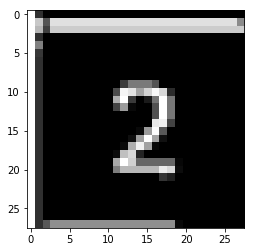

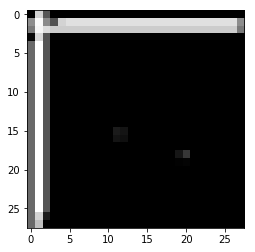

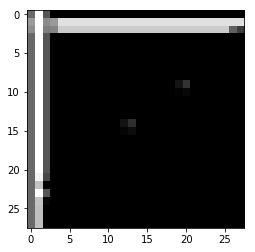

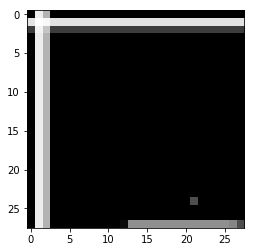

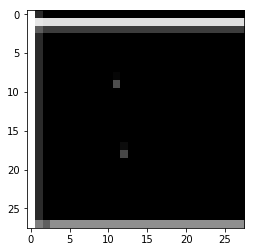

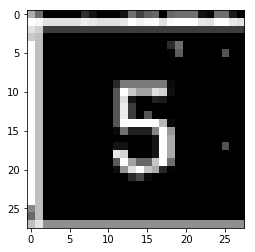

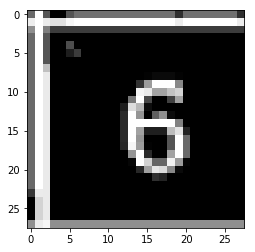

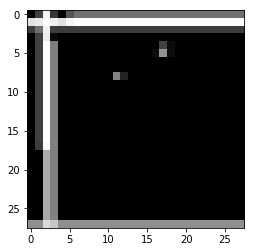

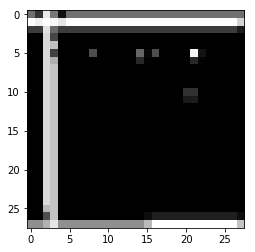

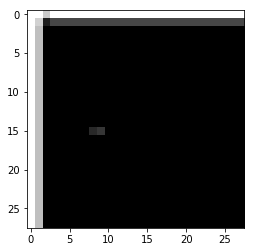

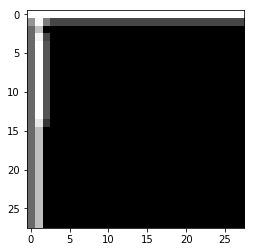

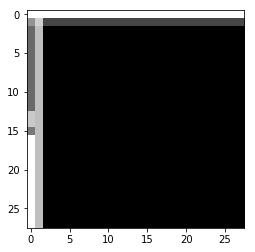

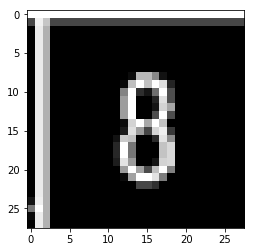

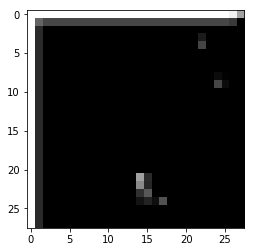

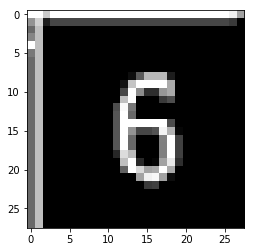

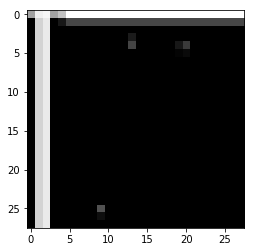

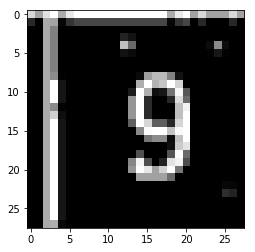

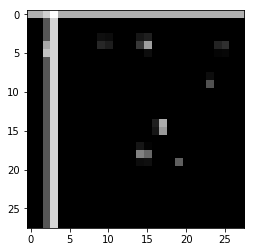

In [9]:
S = np.zeros((9, 9), dtype = 'uint8')
kk = 0
for i in range(0, 9):
    for j in range(0, 9):
        
        y1 = int(Points[j+i*10][1])
        y2 = int(Points[j+i*10 +10][1])
        
        x1 = int(Points[j+i*10][0])
        x2 = int(Points[j+i*10+1][0])
        
        x = x1
        y = y1
        w = x2 - x1
        h = y2 - y1
        
        # cropped cell
        cropped_cell = im_th[y:y+h, x:x+w]
        
        #Region of Interest
        roi = cropped_cell
        # Resize the image
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        
        roi = roi.flatten()
        roi = roi[np.newaxis]
        plt.figure(kk)
        kk += 1
        plt.imshow(roi.reshape((28, 28)), cmap='gray')
        
        S[i][j] = model.predict_classes(roi,verbose=0)
print S
plt.show()